# Replicating 'Delivering Education to the Underserved through a Public-Private Partnership Program in Pakistan: A Randomized Controlled Study'



 This notebook contains the replication of
> Barrera-Osorio,Felipe & Blakeslee,David S.& Hoover, Matthew & Linden ,Leigh & Raju, Dhushyanth & Ryan ,Stephen P. , 2017. "Delivering education to the underserved through a public-private partnership program in Pakistan," Policy Research Working Paper Series 8177, The World Bank.

**Sources used to replicate the study can be found here : [code,data](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/UWXULC) and [paper](http://documents1.worldbank.org/curated/en/868011504015520701/pdf/WPS8177.pdf).**

**Short Remark about the notebook:**

* The notebook attempts to replicate the major results of the study. The Tables and figures are labelled accordingly.
* I also add additional visualizations as seen fit to improve on the readability and lucidity of the study.
* Having originated from South Asia,I am also uniquely placed to enrich the paper with personal observations and interpretations of the results. They are accordingly marked.


## Contents
* [Introduction](#1)
* [Disentangling the Causal Mechanism](#3)
   * [Choice of the Estimation Method](#3_1)
   * [Weaknesses of the Approach](#3_2)
* [Replication of Berrera et.al](#4)
   * [About the data](#4_1)

   * [Impact of the Program](#4_3)
       * [Comparative impact on number of days operational and hours teaching](#4_3_1)
       * [### Comparative Impact on total score and number of teachers](#4_3_2)
   * [What determines probability of enrollment?](#4_4)
       * [Is distance to school more important for female enrollment?](#4_5_1)
       * [What is the relationship between Probability of Enrollment and Distance to School?](#4_5_2)
   * [Exploring the impact on Aspirations](#4_6)
   * [Efficiency : The social planners problem](#4_6_1)
   * [Impact of Program on School Quality](#4_7)
   * [Impact of Gender Differentiated Treatment](#4_8)   


In [7]:
Packages <- c("tidyverse", "haven","dplyr","sandwich","stargazer","IRdisplay","magrittr","xtable","broom","kableExtra",
             "patchwork","ggthemes","ggExtra","viridis","gridExtra","plotly","glmnet","AER","ggeffects","tidyselect")

suppressMessages(invisible(capture.output(lapply(Packages, library, character.only = TRUE))))

**Importing Data**

In [52]:
child_data<- read_dta("data/ReStat_children.dta")
school_data<- read_dta("data/ReStat_schools.dta")

**Importing Functions to plot tables**

In [25]:

#files.sources = list.files()
#sapply(files.sources, source) - in the end,seperate each function into different files

source("auxiliary/Table_functions.r")
source("auxiliary/plotting_functions.r")
source("auxiliary/auxiliary_functions.r")
source("auxiliary/animated_plots.r")


## Introduction <a class="anchor" id="1"></a>

- South Asian Countries, have long trailed in enabling access to quality education to it's rural population. Average student learning is dismally low in most developing countries. (Pritchett ,2013; UNESCO,2014). Governments  are resorting to supporting private schools in various ways to fill the gap left by public education systems. This study used a RCT (Randomized Controlled Trial), the short term impact of a public-private partnership program in Sindh province, Pakistan, called the Promoting Low-Cost Private Schooling in Rural Sindh Province. (PPRS)
- The main objective of the program was to increase access to schooling in marginalized areas, to reduce gender disparity in enrollment and to improve student learning, in a cost-effective manner. The program was funded by the provincial government, and designed and administered by the Sindh Education Foundation  (SEF), a semi-autonomous organization.
- **Brief Overview**
- **Benefits/Treatment**
    - The program offered local private entrepreneurs  who were qualified to participate benefits to run a tuition free, coeducational primary schools in educationally underserved villages. The per student subsidy was at less than half the per student cost for public primary and secondary education in the province. The subsidy was at 350 rupees (\\$ 5 in 2008 US dollars) and a gender differentiated subsidy, where the school received 450 rupees (\\$ 6.4) for each female student. 
    - The program school operator enjoyed freedom in how to structure and run school around existing guidelines.
    - A central challenge of the program was to improve enrollment and outcome for girl students in Pakistan. Not only on the demand side (demand for education among families) and the supply side ()distance and time from home to school, environmental conditions, school infrastructure, teacher characteristics). To address the gender disparity in education, 100 of the 200 program villages received a higher per-student subsidy for girls than for boys, with aim for incentivizing program schools to attract and keep girls in education.
    - To sum up, the treatments are :
        - Per student subsidy (for all program schools)
        - Girl specific student subsidy (50% of the program schools were given additional subsidy for girls on top of the per student subsidy)
- **Random Allocation**
    - The program was randomly allocated to 200 out of 263 qualifying villages in selected districts with poor education outcomes in the province.
    - After the random assignment was completed, SEF scaled down the original evaluation sample from 263 to 199 villages to correct for errors made in selecting the villages qualified in the initial round.
    - The effective sample size consisted of 82 villages under the gender uniform subsidy treatment, 79 under the gender differentiated treatment and 38 as controls.
    - Follow up measurement was conducted after the program schools had completed about 1.5 school years.
    - Mean household characteristics at baseline and follow up measurement in 199 villages were similar across the experimental groups.


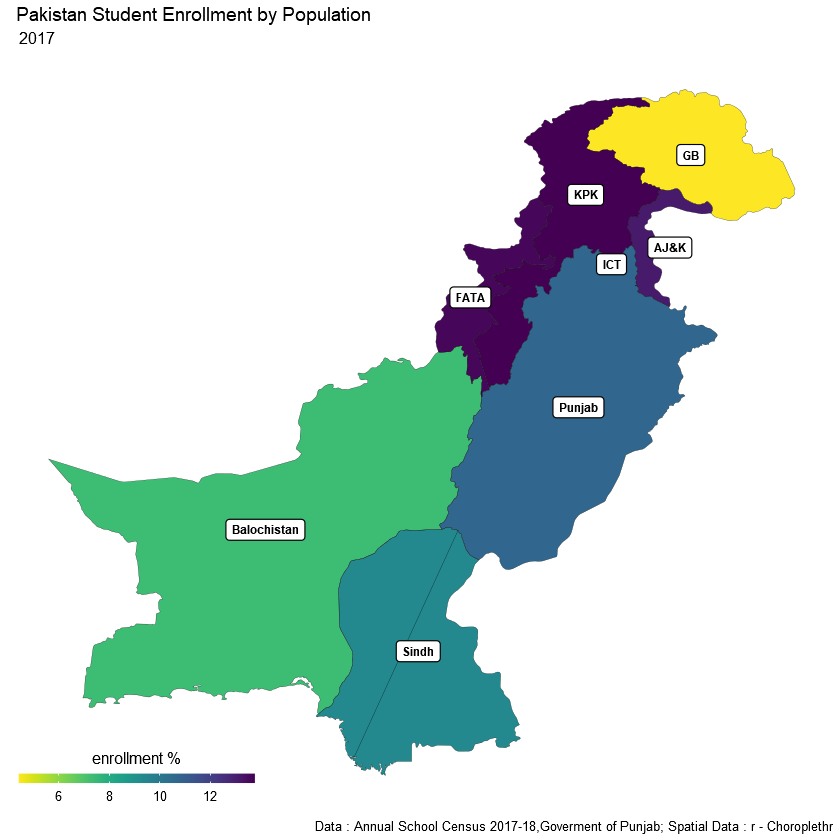

In [8]:
pakistan <- readRDS(file="data/Pakistan.Rda") #loading shape file for map polygon plotting
map_enrollment(pakistan)

## Disentangling the Causal Mechanism   <a class="anchor" id="3"></a>

- In the model by Becker(1962), it is argued that households compare present and future costs and benefits of educating their children. The present costs include school fees and transportation costs. These tend to be the largest costs of primary schooling for households. The PPRS Program reduces the cost of transportation by situating schools in underserved villages and eliminates school fee by providing free schooling. The immediate effect should be an increased household demand for schooling, and accordingly, higher school enrollment.

- Much literature including (Burde and Linden 2013) as well as from quasi experimental evaluations (Foster and Rosenzweid, 1996 ; Duflo,2001; Berlinksi ,Galiani and Gertler 2009) prove that the relationship of distance from home to school is strong. The studies find that when schools are introduced to underserved areas, schooling increases dramatically. The effect of free schooling on enrollment is well documented, with a negative association between price and enrollment. (Deininger,2003; Barrera-Osorio, Linden and Urquiola, 2007)

- On the supply side, the subsidy is directly a function of the enrollment in the program schools, hence greatly incentivizing schools to enroll more students (and in the case of the gender differentiated subsidy - to enroll more female students). This could further lead to small incentives by the program schools themselves, for example - providing safe transportation and a safe schooling environment or even offering a small conditional cash transfer to girls.

- The positive effects on enrollment from interventions that reduce cost of enrolling in school contrast with the mixed effects of the interventions on student learning, measured through test scores. International evidence from conditional transfer programs suggests that exposure to more schooling does not necessarily higher test scores(Fizbein and Schady, 2009; Saavedra and Garcia 2012). More recently, international evidence points to positive effects on test scores, though the results depend on the specific design components of each individual program (Barham and Malccio,2013; Barrera-Osoria and Filmer, 2015)
- To address the complex problem of increasing test scores, the program offered training on school leadership and teaching, and supplied teaching and learning materials, both free of cost. The program also sponsors local private entrepreneurs to establish and operate schools.

- The operators of program schools had much more flexibility than government  schools to determine their input mix and to account for specific local conditions of the students, and adapt to demands of the households. (World Bank, 2004)
- **Disentangling Confounding Factors**
    - The major confounding factors are individual (student specific) factors - such as ability, motivation, health, perseverance, sex. and secondly the household and village/district level factors.
    - Disentangling the effect of innate ability on schooling ability to estimate the effect of the treatment is complex, as well as the motivation and perseverance, and peer groups. These greatly influence test scores and enrollment and require to 'be closed off' to estimate the effect of enrollment in program schools.
    - Household factors such as Access to water, food, parental guidance, electricity, parental wealth, distance to school are important as these factors play a much larger role in determining test scores and enrollment than the choice of school.
    - Accordingly, the causal mechanism looks like as follows -



### Weighing the costs - The correlation between years of schooling and morality

In [ ]:
schooling_mortality_graph()


![](https://firebasestorage.googleapis.com/v0/b/firescript-577a2.appspot.com/o/imgs%2Fapp%2FAbraham_MindDump%2FRmMfkcjF-z.gif?alt=media&token=43e581be-e0a4-4985-a8bc-c68e5f22a524)







### Progress across the years -Primary School enrollment and attendance in the global south

In [ ]:
attendance_vs_enrollment_graph()





![](https://firebasestorage.googleapis.com/v0/b/firescript-577a2.appspot.com/o/imgs%2Fapp%2FAbraham_MindDump%2FjkxwK6L5-H.gif?alt=media&token=845b88ff-c590-4a5b-80cc-99b4d0804ec2)






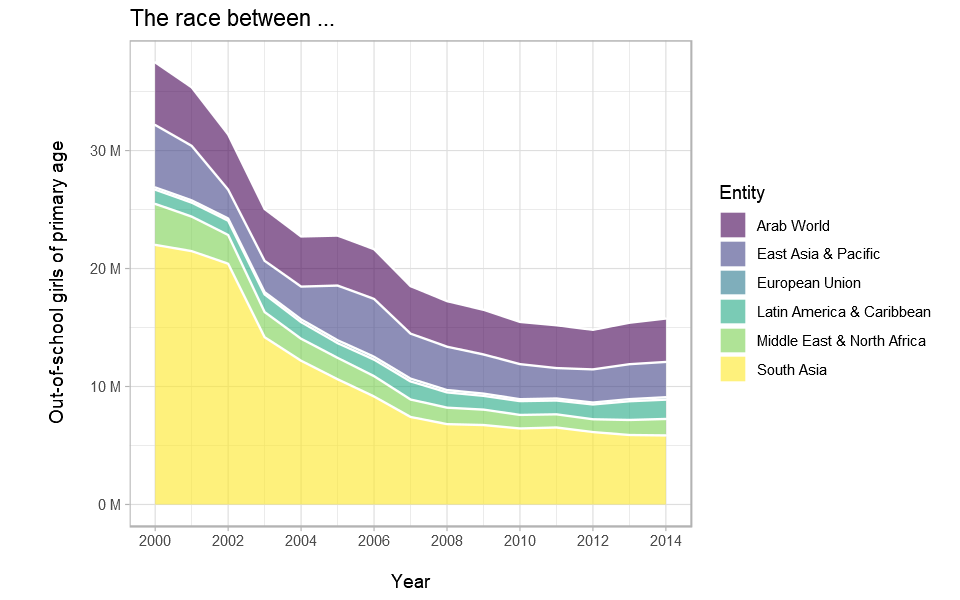

In [328]:


my_data <- read.csv("data/out-of-school-girls-of-primary-school-age-by-world-region.csv")

target <- c("Arab World", "East Asia & Pacific","European Union","Latin America & Caribbean","Middle East & North Africa","South Asia")

colnames(my_data)[4]<- "girls_out_of_school"

my_data<-my_data %>% filter(Entity %in% target) %>% filter(Year>=2000)
my_data %<>% drop_na(girls_out_of_school) %>% mutate(girls_out_of_school=girls_out_of_school/1000000)

fig(8,5)
# Plot
ggplot(my_data, aes(x=Year, y=girls_out_of_school, fill=Entity)) + 
    geom_area(alpha=0.6 , size=.5, colour="white") +
    scale_x_continuous(breaks = seq(2000, 2014, 2)) +
    scale_y_continuous(labels = scales::unit_format(unit = "M"),breaks = seq(0,40, 10)) +
    scale_fill_viridis(discrete = T) +
    theme_light() + 
    ylab("\n\nOut-of-school girls of primary age\n") +
    xlab("\nYear") +
    ggtitle("The race between ...")



## Choice of Estimation Method - Randomized Controlled Trials  <a class="anchor" id="3_1"></a>

- Estimation of Treatment through **Randomized Controlled Trials**
    - Randomized controlled trials have been considered as the gold standard of policy evaluation since 1990s. Famous examples include Kremer et al, studies on Kenya (1994) and PROGRESA experiment (1997). Since 2000,this number of economic studies using RCT's have surged.
    - RCS have significant impact in economic research as -
        - They focus on identification of causal effects and are able to control for almost nearly all confounding factors. Any difference in treatment and control must be due to treatment.
        - Allow iterative experimentation.
            - Experiments are be continued indefinitely, experimenting on hypotheses, you can continue to experiment till clarity is achieved. eg. Duflo, Kremer, Robinson multi year work on fertilizer.
        - Most criticism of RCT's are imperfect randomization, non compliance, and attrition - not the validity of the method itself. (These criticisms will be discussed later in relation to this project.)
        - Allows innovation in measurement.
            - Different methods of survey collection: surveys, wearable technology, self reporting, web scraping,
            - These are not a requirement, but RCT's motivate experimentation as we are exactly aware of what are trying to measure, and do not concern ourselves with unobservable confounding factors.
    - In the context of this paper, RCT's allow us to close off the HH factors and Student/Individual  channels that affect the treatment - allowing us to estimate the effect of the green channel, the direct effects of the Subsidy on enrollment and scores.
    - However it is difficult to estimate the impact of intermediate factors downstream of the treatment due to collinear development of the same. This relies of existing literature to explore internal causal relationships that lead to the combined effects of the treatment.


In [9]:
p=rct_plot(child_data)


![](https://firebasestorage.googleapis.com/v0/b/firescript-577a2.appspot.com/o/imgs%2Fapp%2FAbraham_MindDump%2FD7_1yq8_2f.png?alt=media&token=50ec16e5-3d4e-4adb-ac2d-5655da3672f4)


## Weaknesses of the Approach <a class="anchor" id="3_2"></a>

 Weaknesses of the **Randomized Controlled Trial Approach**.
    - The method of choice cannot guarantee proper disbursal of treatment. This is a classical weakness of Randomized Controlled studies as the key assumption of it's functioning is 'Completely Random Allocation'. In fact, medical trials require double blind randomization, where the researchers themselves are unaware of who the treatment was allocated to.
    - RCT are very effective at determining the effect, but it extremely difficult to justify the causal mechanism that caused the effect. It answers clearly the 'What?' but not the 'How' as a cross comparison of the groups essentially wash out non treatment effects.
    - Self Selection is a major threat to RCT's in it's usage in this paper. The authors themselves acknowledge this, as the threat of students switching from government schools and private schools to program schools cannot be controlled through this methodology. Secondly, the impact of government schools improving their allocation of resources in response to competition from program schools can potentially muddy the results.
- This is represented in the unblocked node 'Student Self Selection' which can affect the student specific characteristics channel - as more able, enthusiastic, disciplined students could self select themselves into program schools. This is especially worrying as in our model, we consider only one time period after treatment for comparison.
    - The Treatment on Treated effect is a mechanism through which the effect of the actual treatment doled out is estimated. It works on the principle that the treatment is not distributed according to the initial randomization, due to non takeup of the treatment.


## About the Data<a class="anchor" id="4_1"></a>

#### Table 1 : Evaluation of Sample Sizes 

In [10]:
Table_1(child_data) 
#results match stata code but not data in paper

Number of:,Control,Pooled Treat.,Gender Uniform Treat.,Gender Differentiated Treat.,Total
Villages,38,161,82,79,199
Baseline Households,1451,6634,3532,3102,24962
Young Children,4567,20395,11036,9359,8085
Households,1069,4857,2554,2303,5926
Young children,3121,14647,7669,6978,17768


- The foundation initially administered a vetting survey to select schools for the program. This survey, the base line survey  was conducted in February 2009. Following the base line survey, 263 villages were randomly assigned into two subsidy treatments, or to the control group.
- After the random assignment, SEF scaled down to 199 villages to correct for errors in the selection stage. These decisions were made without consideration for the treatment status assigned to the villages. The effective evaluation sample consisted of 82 villages under the gender uniform subsidy treatment,79 under the gender differentiated ones and 38 as controls.
- The schools were established in summer 2009. A follow up survey was conducted in April/May 2011, after the conclusion of the second school year under the program.
    - Baseline Survey
        - The baseline survey consisted of 
            - **A village survey** answered by village leaders. 
                - In each village the baseline survey also consisted of a survey of the entrepreneur and proposed teachers, as well as physical checks by the survey interviewers of the proposed schools sights. (Only certain variables available in data provided)
            - **A school survey** of all schools in the vicinity of the village .
                - GPS data was collected from all the schools, the proposed program site and surveyed households [[Questions for Authors]]
            - **A household survey** of 12 households randomly selected from the list submitted by the entrepreneur.
                - The household survey contained information on household ,the household head and on each child aged 5-9. 
    - Follow up survey
        - The follow up survey consisted of 3 instruments :
            - **A school survey**
                - The school survey collected information from interviews of head teachers and all other teachers, and visual checks by interviewers of head teachers and all other teachers and visual checks of the school infrastructural and environment conditions.
                - Also collected was attendance information through a headcount, with the attendance lists used during the household survey to verify the child's enrollment status reported by the household. [[Questions for Authors]] 
            - **A household survey**
                - The household survey was administered to households with at least one child aged 5–9. In large villages, up to 42 randomly sampled households in the village were interviewed; in villages with fewer than 42 households, which comprised the majority, all households in the village were interviewed. 
                - The survey was multi-topic, and had extensive modules on past and current schooling and other activities for children aged 5–17, answered by the household head or another primary adult household member.
            - **A child survey**
                - The child survey was administered to each child aged 5-9. It asked questions mainly on work activities performed inside and outside the home, past and current schooling and aspirations. Each child was then administered tests on language (either Urdu or Sindhi, as preferred) and mathematics
    - The **baseline survey interviewed 2,089 households and 5,556 children aged 5–9**, and the **follow-up survey interviewed 5,966 households and 17,720 children aged 5–17**.


## Comparability of Control and Treatment Groups


#### Table 2 Balance across  program and control villages

In [11]:
Table_2(child_data)

Characteristics,Baseline Control,Baseline Treatment - Control,Followup Control,Followup Treatment - Control
Child age,6.898,-0.084,7.354,0.081 *
Female,0.366,0.058,0.424,0.03 *
Child in School,0.233,0.029,0.284,-0.027
Child of hh head,9.749,-0.673,0.856,0.022 **
Household size,3.068,-0.293,7.221,-0.097
Number of Children,2.665,0.190,4.755,-0.14 **
Household head education,0.709,-0.010,2.631,0.127
Household head farmer,,,0.562,-0.016
Total land,,,4.229,0.898
Pukka house,,,0.056,-0.004



To assess the validity of the RCT we need to first reassess the compatability of population across control and treatment.
Since the program was randomly assigned across villages,treatment status can be considered orthogonal to household and child characteristics that could spuriously influence the outcome. As far as this holds, we can sufficiently assume that the students not selected for the program offer a good counterfactual to estimate the treatment effect on program schools.

In Table 2, to access the comparability of the villages across baseline and control, we construct the average differences on characteristics not directly associated with the treatment.The goal is to identify whether any structural differences exist between the treatment and the control group.
Columns (2) and (4) report the differences in mean characteristics between program and control villages, at baseline and follow-up, respectively. The difference in means is very small and statistically non significant. 
The exception is the percentage of girls in program villages- which was slightly higher (4.3 percentage vs 3.0 percentage points at baseline and follow-up respectively).





## Treatment Impact <a class="anchor" id="4_3"></a>

The program impact is based on the specification of

$$Y_{i}=\beta_{0}+\beta_{1} T_{i}+\beta_{2} X_{i}+\varepsilon_{i j}$$

Where $Y_{i}$ is the outcome of interest for each child $i$ in village $j$ and $T_{j}$ is an indicator variable for Treatment. Household characteristics include the education of the household head,number of children,number of adults. Child characteristics are age and gender. In specifications given below we examine the differential impacts of the program by gender,by both the pooled treatment and the gender-differentiated treatment. Standard errors are clustered at the village leve., $j$.


The impact of outcomes on  **enrollment** , **days operational**,**number of teaching hours**,**quality of schools** are some of the main focus of the study.



### Comparative impact on number of days operational and hours teaching <a class="anchor" id="4_3_1"></a>

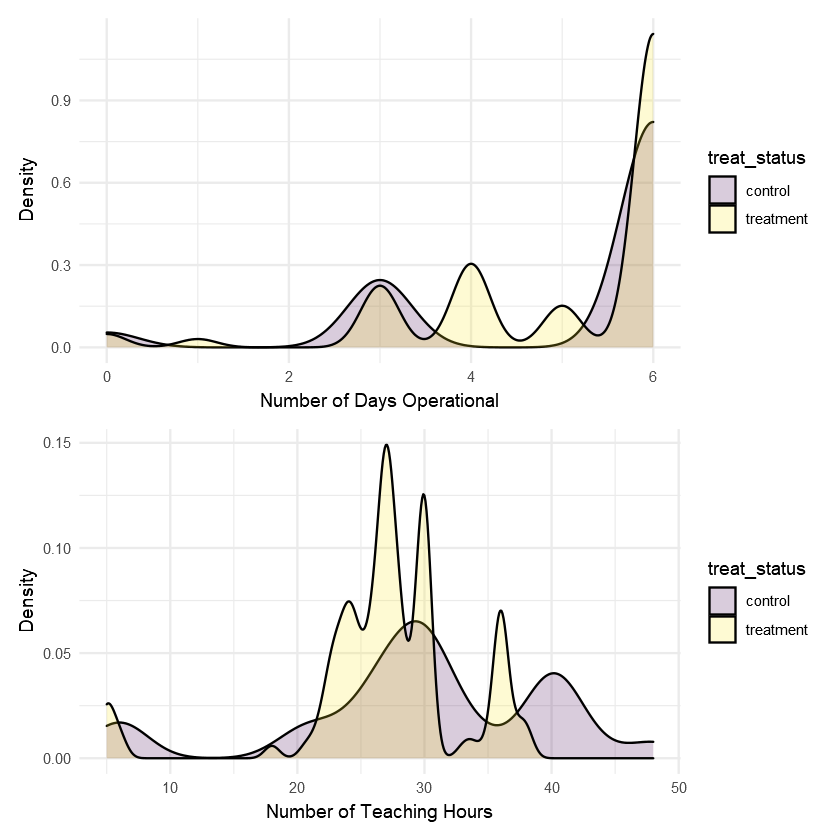

In [12]:

impact_hours_days_teaching(school_data)

The comparative effect of the program on Number of Days operational and number of teaching hours is visualized in the previous figure.
The treatment schools clearly have high test scores on average,while the number of teaching hours tend to have high density in the 30 hour range.

The number of days operational is a major indicator for school quality, as schools in rural Pakistan are often closed due to various reasons including infrastructural reasons, or due to absence of one or more teachers.
The statistic itself needs to be interpreted with caution, as number of days operational,alone does not provide a robust indicator of school uptime.
In addition with number of teaching hours, we obtain a clearer picture of the treatment effect.
Program schools are more consistent in number of teaching hours, and in number of days open per week. While non program schools show high variance
in their number of teachings hours.
This is due to many reasons including teacher absence,switching to administrative related tasks,and due to teachers spending excess time on 
punitive measures, or leaving the class to its own devices. Distance to school can also play a role in number of teachings hours, as less accesible schools
begin classes later during the day.


The extent to which teachers are motivated is a significant factor in influencing
the delivery of quality education. Herzberg in his famous two-factor theory
suggested that the factors, which contributed to job satisfaction (motivators)
and those which contribute to job dissatisfaction must be
applied separately on workers to enhance increased productivity (Hinton,
1968). The motivation of teachers in pakistan, and India, especially in rural regions are small as there is little incentive to expend extra effort.Teachers are rarely quality controlled, and the focus is on enrollment volume as opposed to school quality.


This ties into the later arguments on the impact of treatment on school infrastructural quality, as they directly impact teacher motivation.The persistent high poverty, poor
environment, low salaries, limited opportunities for professional improvement,
social and geographic isolation, inter alia, have made rural schools unattractive
for highly qualified and experienced teachers (Ababa 2011)


A second major incentive for teachers to stay and work in rural areas is the
availability of a house. When teachers cannot live near the school, they are
more likely to expend a lot of time travelling, often to the detriment of their school
work. Housing is particularly important for female teachers. In Malawi, the
EMIS data shows a strong association between the availability of housing
in an area and the presence of female teachers in the school. In a study
shown on primary school teachers’ attrition in Uganda, the availability of housing
is considered to be a major factor in enabling teacher retention, even more so in the case of rural regions(Mulkeen, 2005). 

Another reason for low number of teachings hours and days is due to low teacher retetion. An attrition rate of 5% is normal in most rural regions. This is due to teachers retirting,unable to continue due to sickness and death as well as due to promotion to non teaching activities. It is however to estimate precise attrition rates due to lack of proper record keeping in most rural aschools.
The main causes include low salary,poor working conditions and distance to schools.
The program most likely captures a positive effect due to improved funding,and as discussed later, a improvement in the infrastructural capabilities of program schools.


Chaudhury et al. (2006) has found that 25% of teachers at a absent
at a typical government-run primary school, and the absence rate ranged from 15% in Maharashtra
to 42% in Jharkhand. It was also discovered that 45% of teachers are only routinely engaged in teaching at the time of the visit. Muralidharan and Kremer (2008) discoverd that  private school teachers are less likely to be absent (2-8%) and (6-9%) more likely to engage in teaching activity at a given moment.




### Comparative Impact on total score and number of teachers  
<a class="anchor" id="4_3_2"></a>

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


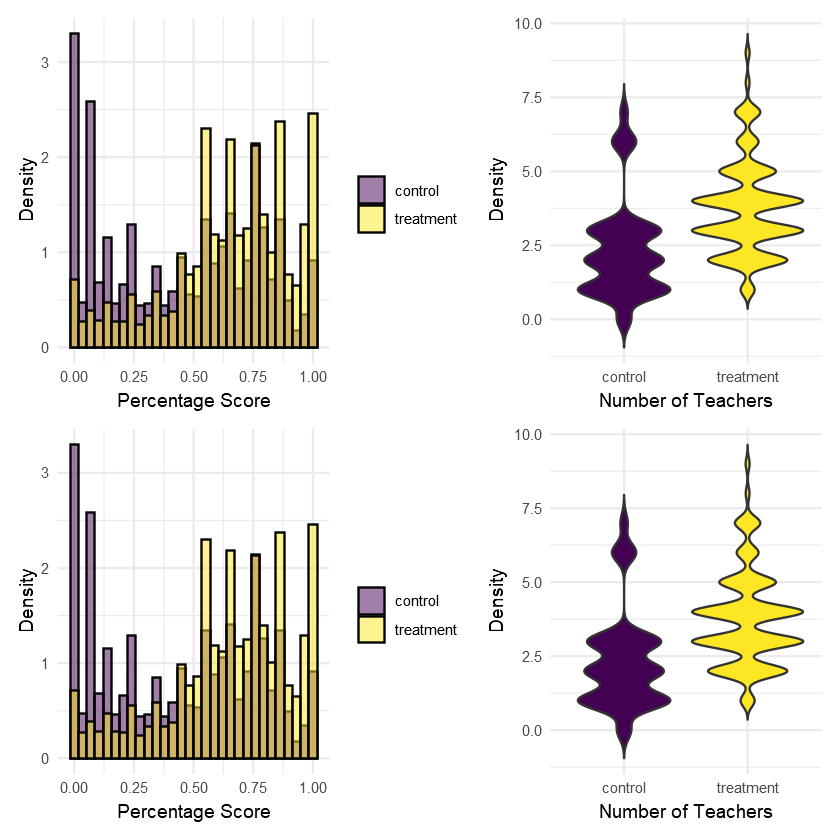

In [13]:

impact_score_teachers(school_data)

**Test scores** for children aged 5-9 are standarized by subracting the mean and diving the standard deviation in control villages.  Table 4 reports the the impact of the pooled treatment on test scores. Column (1) through (4) reports the effect of the Pooled Treatment on Math Scores, under different set of controls.
The remaining columns show the impact on Urdu and Total Score.
On comparison with model with full set of controls by 0.63 standard deviations.

The program increased tesct scores by on average 0.53 standard deviations over students not part of the program.
The results appear to show that program schools were quite effective in imparting basic math and language skills to students.
However this effect could also be due to the observer effect, i.e, program schools could well have been aware that would be tested. This does not greatly affect the legitimacy of the results,as program schools can be expected to regularly report results and statistics to continue being provded funding.


The improvement in test scores could be due to the causal channal of improved funding and the resultant higher salaries and working conditions for teachers,as well as the pressure on program schools to justify funding.
Program Schools,being newly established,were also less likely to be lethargic in efficiently using funds,and teachers were likely to be more motivated.

Further methods to improve test scores and basic cognitive function is the introduction of technology. (JPAL Evidence Review 2019)
Educational Software designed to help students develop particular skills have shown enormous promise in improving learning outcomes,particularly in math.Computer assisted learning program has reported statistically significant results (Barrow 2009).

Early childhood and Elementary can also have a domino effect on later cognitive skill. Young children have been found to do better when they have gained better basic math and language training.Learning at home is also a sigfnificant indicator of student ability.However this is also indicative of higher income parents as low income parents deal with high stress,limites resources and time constraints at home- and do not regularly dedicate time to these activities.


**Number of Teachers**


The number of teachers at any given day in a rural school deepds on varied factors. Low teacher retention and absences due to sickness,time to travel and no enforcement mechanism is common. Teachers in most small rural schools face no punitive measure for their absences, either due to a lack of such a framework or through collusion among teachers.High-ranking teachers are more likely to be absent that lower ranking ones. Men are also shown to be more absent that women. (Chaudhary et. al. 2006)

Pay seems to have little to no impact on teacher absences,but previous studies indicate that infrastructure quality is a big determinant of teacher presence.Teacher from local areas are absent less often. This indicates the importance of closer schools in reducing teacher absences and increasing teacher retention.Teachers is rural schools are more likely to be hired on a contract basis.In the program treatment, the teachers were hired on a contract basis. They have been shown to be more likely to have higher absence rates. 




Teachers from the local area are absent less often. There is little evidence that pay
strongly affects absence (at least in the range of pay where we have data); by
contrast, we do find evidence suggesting a role for the quality of infrastructure at the
facility. This finding is consistent with the idea that teachers and health workers are
extremely unlikely to be fired for absence, but that their decisions about whether to go
to work are influenced by the working conditions they face. Contract teachers, who are
not subject to civil service protection and earn a fraction of what civil service teachers
earn, do not have lower absence rates.


Another determinant of number of teachers is salaries,promotion determined by educational qualification and seniority. In rural schools with a average of 5 teachers,there is little to no room for promotions. Moreoever, the teachers lack the educational qualifications necesary to be promoted. In developing countries, the promotion aspiration is weak,and very unlikely to be a motivating factor.




####  Table 4 Impact on Test Scores

In [14]:
Table_4(child_data)

, Program Impacts on Test Scores , Dependent variable: , , Math Score Urdu Score Total Score , (1) (2) (3) (4) (1) (2) (3) (4) (1) (2) (3) (4) , Pooled Treatment 0.532 *** 0.522 *** 0.521 *** 0.627 *** 0.503 *** 0.494 *** 0.492 *** 0.591 *** 0.537 *** 0.527 *** 0.525 *** 0.631 *** , (0.027) (0.027) (0.027) (0.024) (0.026) (0.026) (0.026) (0.023) (0.026) (0.026) (0.026) (0.023) , , Child Controls no yes yes yes no yes yes yes no yes yes yes , HH Controls no no yes yes no no yes yes no no yes yes , District Fixed Effects no no no yes no no no yes no no no yes , Observations 10,464 10,464 10,464 10,464 10,521 10,521 10,521 10,521 10,426 10,426 10,426 10,426 , R 2 0.049 0.076 0.087 0.189 0.049 0.073 0.085 0.188 0.054 0.082 0.093 0.204 , Adjusted R 2 0.049 0.076 0.086 0.187 0.049 0.073 0.084 0.186 0.054 0.082 0.092 0.202 , Residual Std. Error 1.019 (df = 10462) 1.005 (df = 10459) 0.999 (df = 10451) 0.942 (df = 10442) 0.961 (df = 10519) 0.949 (df = 10516) 0.943 (df = 10508) 0.889 (df = 10499) 0.977 (df = 10424) 0.963 (df = 10421) 0.957 (df = 10413) 0.898 (df = 10404) , F Statistic 544.136 *** (df = 1; 10462) 215.461 *** (df = 4; 10459) 83.148 *** (df = 12; 10451) 115.798 *** (df = 21; 10442) 545.966 *** (df = 1; 10519) 208.123 *** (df = 4; 10516) 81.648 *** (df = 12; 10508) 115.409 *** (df = 21; 10499) 597.368 *** (df = 1; 10424) 232.581 *** (df = 4; 10421) 89.321 *** (df = 12; 10413) 126.839 *** (df = 21; 10404) , Note: * p<0.1; ** p<0.05; *** p<0.01 ,

## What determines probability of enrollment? <a class="anchor" id="4_4"></a>

School enrollment data was collected through two means. First, a household survey respondent was questioned on whether the child was enrolled
during the previous school term, and the enrollment of the child was verified using a student attendance list compiled through a headcount
during the just concluded school term. Both these results are reported and discussed accordingly.

Table 6 reports the pooled-treatment and gender differentiated impact on reported enrollment,with a set of household controls and village level fixed effects.
We find a 33.5% increase in enrollment over all age groups. The school survey was conducted first,so the school-attendance decision 
will not be influenced by the presence of survey interviewers. To prevent artificial inflation of attendance in program schools,the attendance
lists were verified by the household level survey.


Table 3 shows that though older chldren were not the expressed target population,a significant increase in reported enrollment for them is found.
The program raised reported school enrollment by 11 percentage points. [@AR Fill in]

Previous literature has attempted to disentage the causal relationship influencing school enrollment,especially for female students.s. In
access to education: in low and moderate income countries, the enrollment rate for girls in secondary school was 34% in 2010, while that for boys was 41%. 20 years before, the rates were respectively 22% and 30%.(Duflo 2012)
The main hurdles in the way of educational attainment include poverty,lack of schools,low goverment spending,poor infrastructure,gender disparity,lack of teachers and distance to school.

Distance to school is empirically proven to be a bigger determinant of school enrollment for girls,improving infrastructure is shown to greatly positively affect the same as well. Girls are more responsive to sanitary conditions,different environments face different challenges.However this is region dependent. In Nepal,few girls reported missing schools due to lacking sanitary products. (Oster and Thomton 2011). Randomized trials of school health interventions include a breakfast program in Peru, in which a high quality breakfast offeredat the schol improved enrollment (Cueto & Chinen,2008) and a RCT by Miguel and Kremer (2004) which found that absenteeism in Kenyan schools for which students received deworming treatment is 25% lower that comparison schools, and deworming increased schooling by 0.14 years,but with no increase in test scores.


Direct cash transfers are also a way to consistently increase number of kids who enroll, and percentage of students who are present regularly. Transfers come with conditions such as ensuring the students attend school.Conditional cash transfers are shown to be more effective. Latrine construction have been especially shown to greatly improve female attendance.(Kelly 2011)

Caste and ethnicity can also be an issue : Evidence from India suggest tha children from scheduled casts and tribes are less likely to be enrolled in primary schools, even when parental education and income are controlled for (Dreze and Kingdon 2001). 
Hence,populations need also to be targereted on the basis of social strata when attempting to improve enrollment.





In [15]:

Table_3(child_data)

, Program Impacts on Enrollment , Dependent variable: , , Reported Enrollment Highest Grade Attained , (1) (2) (3) (4) (5) , Pooled Treatment 0.316 *** 0.316 *** 0.313 *** 0.317 *** 0.382 *** , (0.013) (0.013) (0.013) (0.012) (0.030) , , Child Controls no yes yes yes yes , HH Controls no no yes yes yes , District Fixed Effects no no no yes yes , Observations 11,717 11,717 11,717 11,717 11,211 , R 2 0.086 0.087 0.103 0.109 0.225 , Adjusted R 2 0.086 0.087 0.102 0.107 0.224 , Residual Std. Error 0.452 (df = 11715) 0.452 (df = 11712) 0.448 (df = 11703) 0.447 (df = 11694) 1.184 (df = 11188) , F Statistic 1,101.769 *** (df = 1; 11715) 279.463 *** (df = 4; 11712) 103.667 *** (df = 13; 11703) 65.055 *** (df = 22; 11694) 147.720 *** (df = 22; 11188) , Note: * p<0.1; ** p<0.05; *** p<0.01 ,

#### Is distance to school more important for female enrollment? <a class="anchor" id="4_5_1"></a>

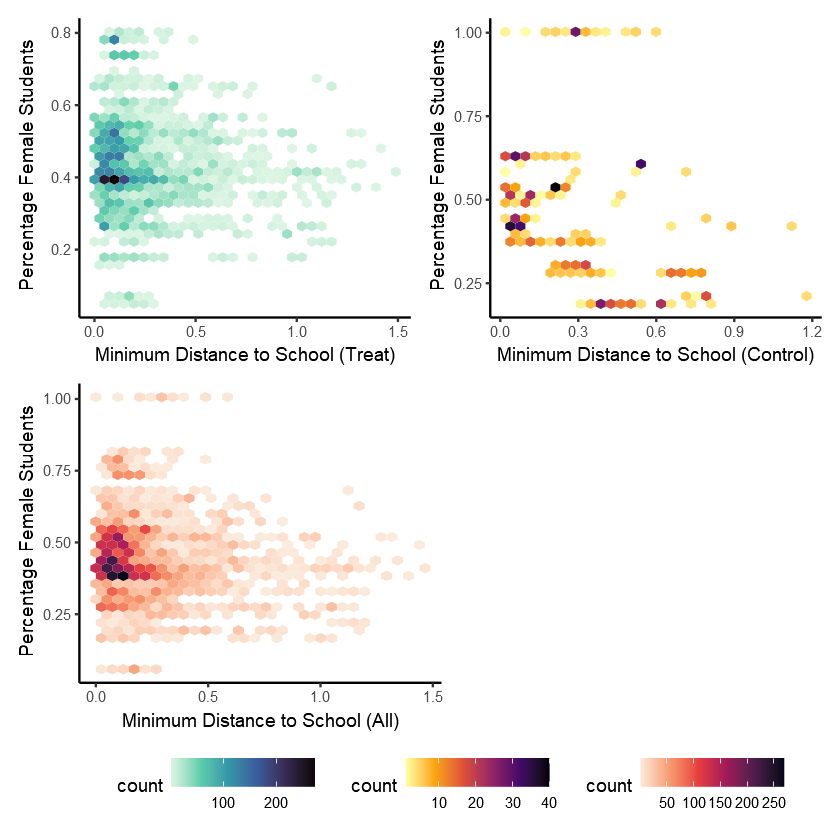

In [16]:
enroll_girls_dist(school_data)

In many cases, girls who manage to beat the challenge of completing primary school and otherwise transition to seconday school face many challenged. The distance to the nearest primary school is a major concern- the distance to the primary school 
involves a higher oppurtunity cost, as the parents must either arrange for transportation or an adult to accompany her.This has considerable empirical evidence, for example in Bihar, a goverment program gave every 14 year old girl a bicycle.This increases secondary school enrollment by 32%, with the impact mostly focussed on girls who lived between 2-6 miles from school.



    
The previous figure,shows that our data reflects the same. Percentage female students are higher both for pooled treatment and the control group when the minimum distance is low. When on average the distance is significantly low, the schools actually have a higher proportion of females.














#### What is the relationship between Probability of Enrollment and Distance to School?<a class="anchor" id="4_5_2"></a>

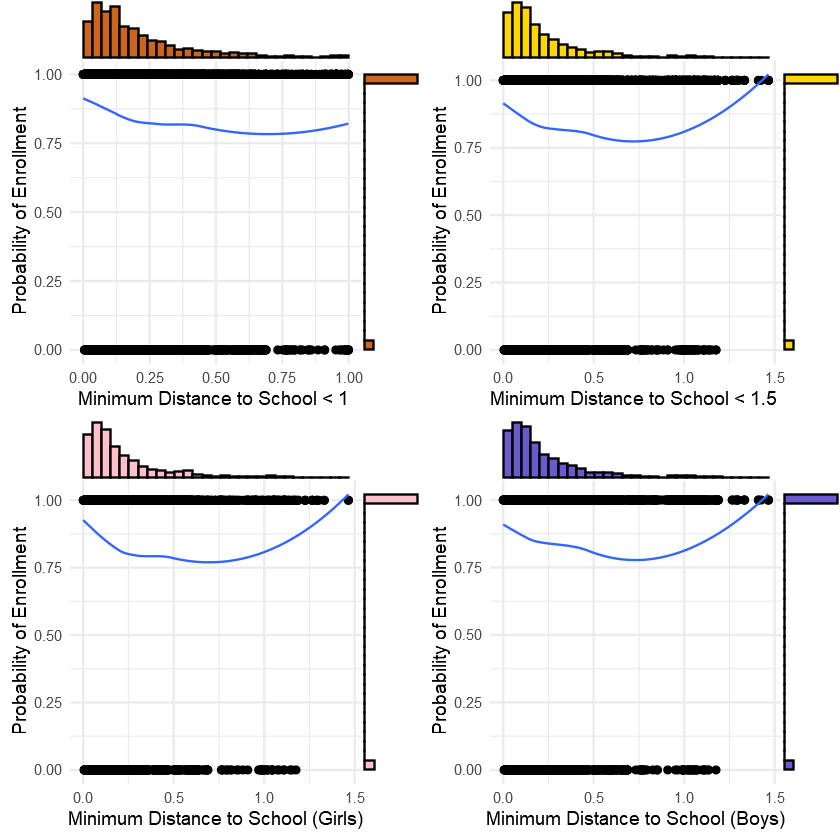

In [17]:
suppressWarnings(marginal_plot (school_data))

#### Table 6 Gender differential impact by subsidy treatment

In [18]:
Table_6(child_data)

, Gender differential impacts by the subsidy treatment , Dependent variable: , , Reported Enrollment Highest Grade attained Test Scores , Treatment gender uniform 0.335 *** 0.415 *** 0.576 *** , (0.017) (0.033) (0.045) , , Treatment gender uniform x Female -0.038 -0.099 ** 0.087 , (0.027) (0.050) (0.067) , , Treatment gender differentiated 0.316 *** 0.375 *** 0.636 *** , (0.017) (0.034) (0.045) , , Treatment gender differentiated x Female -0.001 0.051 0.043 , (0.026) (0.050) (0.067) , , Observations 11,658 11,152 10,376 , R 2 0.110 0.226 0.204 , Adjusted R 2 0.108 0.224 0.202 , Residual Std. Error 0.447 (df = 11633) 1.184 (df = 11127) 0.898 (df = 10352) , F Statistic 59.628 *** (df = 24; 11633) 135.473 *** (df = 24; 11127) 115.093 *** (df = 23; 10352) , Note: * p<0.1; ** p<0.05; *** p<0.01 ,

Warning message in predict.lm(model, newdata = fitfram, type = "response", se.fit = se, :
"prediction from a rank-deficient fit may be misleading"

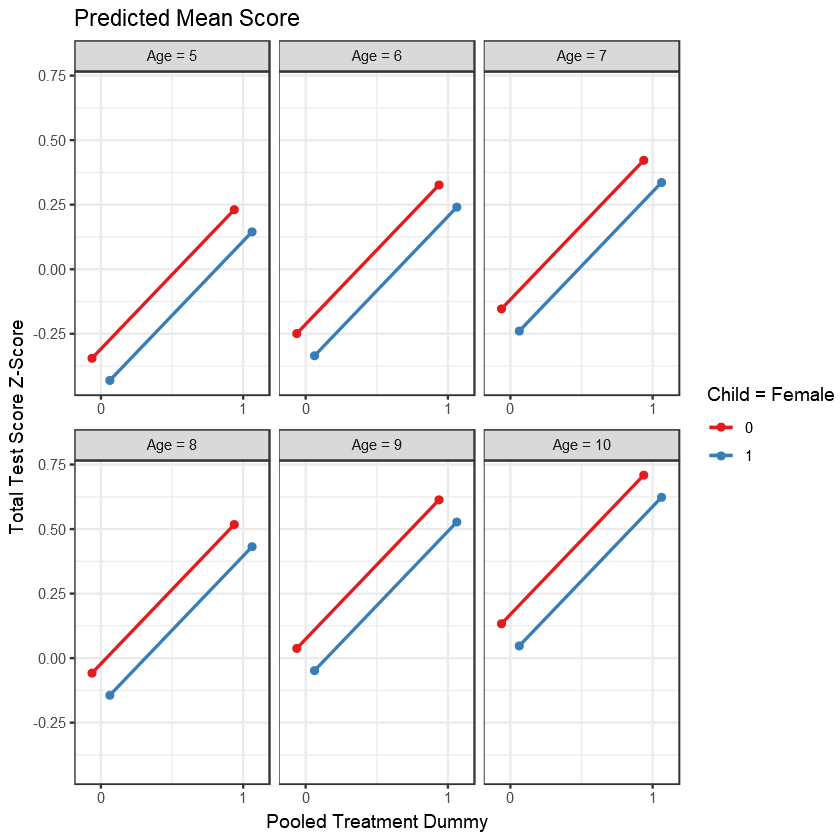

In [19]:
data=child_data

child_controls = c("Age", "fu_female", "missing_fu_child_age", "missing_fu_female")

    
hh_controls = c("control_fu_adults", "control_fu_hh_head_edu","control_fu_hh_head_occ_farmer" ,"control_fu_total_land", 
             "control_fu_household_size" ,"missing_fu_adults", "missing_fu_hh_head_edu" ,"missing_fu_hh_head_occ_farmer",  
             "missing_fu_total_land", "missing_fu_household_size")

independent_vars = c("treatment_1", "treat_1_female" ,"treatment_2","treat_2_female")
district_control =c("factor(bl_district)")


child_data_subset= data %>% filter(fu_child_level == 1 & fu_young_child == 1)
child_data_subset$Age=child_data_subset$control_fu_child_age

child_data_subset$treatment_1<- factor(child_data_subset$treatment_1, levels=c('0','1'))
labels=c('Pooled Treatment','Control')

x_vars <- c(independent_vars,child_controls,hh_controls,district_control)



full.formula <- as.formula(paste('total_score_dev', paste(x_vars,collapse = ' + '),sep='~'))

lm_score<-lm(full.formula,data=child_data_subset,weights=child_data_subset$hh_weight)

x<-ggpredict(lm_score, terms = c("treatment_1", "fu_female","Age"), ci = FALSE, add.data = TRUE)
plot(x,connect.lines = TRUE,facet = TRUE, ci.style = "errorbar", dot.size = 1.5) + labs(
    x = "Pooled Treatment Dummy", 
    y = "Total Test Score Z-Score", 
    title = "Predicted Mean Score"
  )+ labs(colour = "Child = Female")+theme_bw()
  


## Exploring the Impact of the Program on Child Aspirations <a class="anchor" id="4_6"></a>

- The impact on Test Scores and School enrollment is ample cause for a shift in aspirations. Table [@TEAM] reports  impacts on aspirations for each child aged 5-17 conveyed by the household and those conveyed by each child aged 5-9. Column(1) reports the means in control villages and column (2) reports the difference in means between program and control villages. Gender differential impact of treatment is also considered. Columns (3),(4),(5) report regression coefficients for girls, the program and the interaction of the two respectively.


- In comparison to children in control villages, program village households are more likely to desire that boys become doctors (+5.8%)  and engineers (+2.6%)and less likely to aspire that they become security personnel. Girls were also more likely to be encouraged to become teachers, and a strong negative decrease(-12%) in aspiring female children become housewifes. Age of marriage shows no difference to that of control villages.
- In terms of child aspirations, boys were much more likely to aspire for public sector employment and program village children did not adapt their desire for more years of education based on treatment. In both program and control villages- more years of education was desired by households. (11.3 years for children versus 7.4 years for households in control villages. )


- The relatively high aspiration to become a doctor or engineer has it's roots in cultural norms and the social value premium attributed to these two particular professions. In South Asia- including both India and pakistan, there is siginificant parental pressure on chidlren to either opt for engineering or medical schools. This is in stark contrast to countries in the developed world, where the biggest aspirations tend to be 'sport persons' or 'celebrities'.


- There is a difference between 'expectation' and 'aspiration' - as aspiration is what one hopes to happen, and expectation is what one expects to happen, and expectation is often difficult to measure in a conventional sense.
- More well-off parents generally tend to have higher aspirations, and this often leads to also higher gaps in attainment. () Parental aspiration can markedly affect parental involvement, and this has a effect on children's achievement even after all the other explanatory variables have been accounted for according to Gill and Reynolds (1999).


- There is a well established precedent that educational expectation was linked with achievement (Duncan et al. 1972) as well as expectations and educational participation (Reynolds and Burge,2008). There is ample evidence to account for the relationship between motivation and educational achievement. (Desforges and Abouchaar, 2003; Flouri, 2006; Jacob and Wilder, 2010)


- There is a long-established suggestion that educational expectations and achievement (Duncan et al., 
1972), and expectations and educational participation (Reynolds and Burge, 2008), are linked. Many 
studies suggest that young people with higher educational aspirations have greater motivation and 
higher educational attainment than their peers (Desforges and Abouchaar, 2003; Flouri, 2006; Jacob and 
Wilder, 2010). Blaver (2010) looked at 1,391 Hispanic young people from the 2003 Trends in International 
Mathematics and Science Study (TIMSS), and found that self-reported competence in maths was 
associated with future educational aspirations, and also with maths achievement.


- A causal relationship has been accepted between aspiration and education in sociology ( Nash,2000) Bourieu argues that students 'internalize' odds to product 'the objective changes' presented upon them by the social structure. The theory that aspirations are strongly rooted in social and parental aspirations is difficult to test - as the wealth strata is a endogenous variable, that would need to be instrumented.


**Table 7 Impact of Treatment on Aspirations**

In [20]:
figure_2.1_data <- Table_7(child_data)

Characteristics,Control,Treatment - Control,Female,Treatment,Treatment x Female
Civil Servant,0.123,0.006,-0.066 ***,0.014,-0.01
Doctor,0.109,0.055 ***,-0.031 .,0.067 ***,-0.024
Private Enterprise,0.013,0.003,-0.012 *,-0.001,0.009
Engineer,0.008,0.022 ***,0.002,0.029 ***,-0.016 *
Farmer,0.053,-0.038 ***,-0.077 ***,-0.063 ***,0.061 ***
Housewife,0.132,-0.055 ***,0.259 ***,-0.009,-0.121 ***
Laborer,0.011,-0.003,-0.006,-0.002,-0.002
Landlord,0.007,0.001,-0.008 *,0,0.002
Police/army/security,0.095,-0.015 *,-0.119 ***,-0.021 *,0.02
Teacher,0.28,0.058 ***,0.098 ***,0.028 .,0.056 *


###  Visualizing the Impact on Aspiration across Pooled and Gender-Differentiated Treatment

In [18]:
a<-ggplot(data = figure_2.1_data,
          aes(x = reorder(results.df.Characteristics,results.df.fu_treat), y = results.df.fu_treat,
           fill = results.df.fu_treat > 0))+ theme_minimal()+ geom_bar(stat = "identity")+ coord_flip() +theme(legend.position = "none")+scale_fill_viridis_d(option="rocket")+labs(x="Aspirations All ",y="Effect (Pooled Treatment)")                                                   
b<-ggplot(data = figure_2.1_data,
           aes(x = reorder(results.df.Characteristics,results.df.fu_treat_female), y = results.df.fu_treat_female,
           fill = results.df.fu_treat_female > 0))+ theme_minimal()+ geom_bar(stat = "identity")+ coord_flip() +theme(legend.position = "none")+scale_fill_viridis_d()+labs(x="Aspirations Females ",y="Effect (Gender based treatment)")                                                   
                                                 
figure_2.1<-(a/b )
print(figure_2.1)
                                                 
                                                 

ERROR: Error in ggplot(data = figure_2.1_data, aes(x = reorder(results.df.Characteristics, : object 'figure_2.1_data' not found


## Efficiency : The social planners problem facing the Program Schools <a class="anchor" id="4_6_1"></a>

#### Table 8 Impact of program on school quality

In [22]:

circle_plot_data<-Table_8(school_data)

Warning message in summary.lm(x):
"essentially perfect fit: summary may be unreliable"Warning message in summary.lm(x):
"essentially perfect fit: summary may be unreliable"

Characteristics,Program Schools,Program - Govt. Schools,Program - Pvt. Schools
Days operational,5.118,0.515,0.342
Open admission,0.859,-0.024,-0.072
Uniform required,0.024,0.024,-0.315
Tuition required,0.000,0.000,-0.443
Medium:Sindhi,0.613,-0.370,-0.024
Medium:English,0.309,0.309,-0.054
Total Teachers,3.781,0.940,-2.541
Female Teachers,1.988,1.451,-3.439
Post secondary,1.890,-0.454,-1.499
<5 yrs Experience,3.132,2.478,0.940


#### Visualizing the impact of program on school quality

`summarise()` has grouped output by 'id'. You can override using the `.groups` argument.
Warning message:
"Ignoring unknown aesthetics: label"Warning message:
"Removed 60 rows containing missing values (position_stack)."Warning message:
"Removed 4 rows containing missing values (geom_text)."Warning message:
"Removed 20 rows containing missing values (geom_text)."

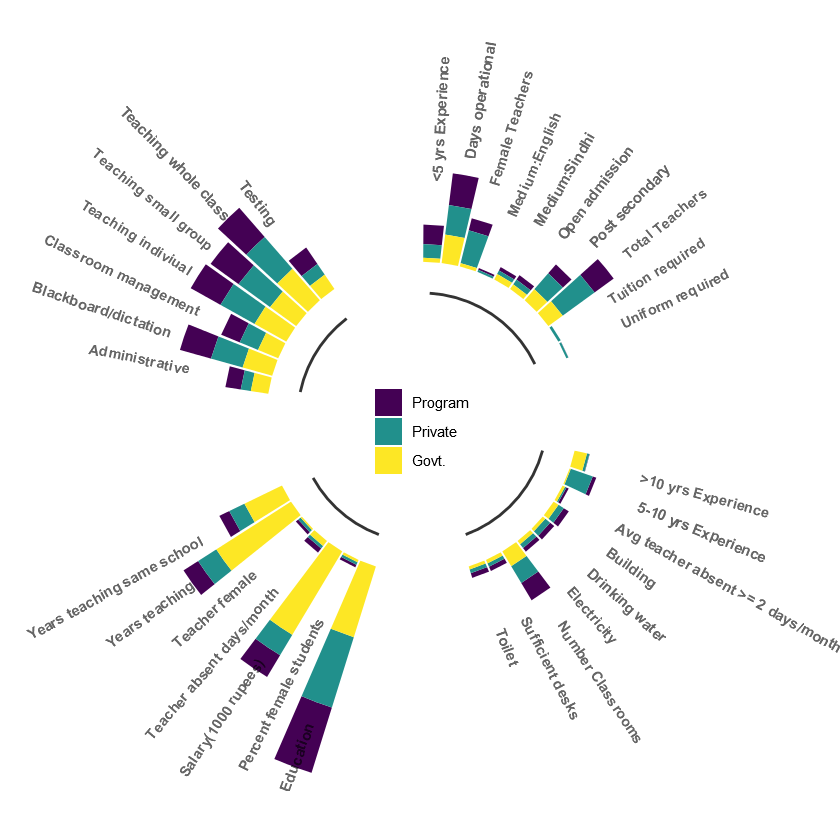

In [23]:

circle_plot(circle_plot_data)

# Robustness Checks :

## Robustness Check :Using Instrumental Variables to Meaure CA ITT (Contamination adjusted intention to treat)

- Instrumental Variables for Binary Treatments with Heterogeneous Treatment Effects:
A Simple Exposition Alan Manning
    - To control for the endogenous effect of the treatment, i.e, the so called  'self-selection bias', we can use instrumental variables. The 'self- selection' bias occurs when all the student who were allocated the treatment did not take up the treatment. Therefore there is a differentiation between Treatment on Treated (TOT) and Intention to Treat (ITT). The treatment on treated analysis assesses the effect of the treatment on those who actually received the treatment. The intention to treat analysis however analyzes the effect on all who were allocated the treatment, but may or not have been treated.. In a perfect scenario, they would be the one and the same - i.e, the differences in the group are entirely due to the treatment.
    
    - Using instrumental variables, we can control the contamination of people who were allocated the treatment but did not take it up. In this scenario, students who were allocated the treatment but did not enroll contaminate our analysis. This contamination adjusted intention to treat analysis can be assessed through instrumental variables.
    
    - The concept behind this CA ITT is straight forward- the randomised controlled trial is the Instrumental variable, and the actual treatment assignment is the instrument. The effect of the treatment assignment on observed outcome (Intention to treat is) is adjusted by the participants who actually received the treatment. Therefore, it is a additional robustness check to the ITT analyses, that have so far been introduced in the project.
    
    - [Causal Graph]
    


In [24]:
iv_robust_check(child_data)

, Program Impacts on Test Scores , Dependent variable: , , , Math Score Math Score Math Score Math Score Urdu Score Urdu Score Urdu Score Urdu Score Total Score Deviation Total Score Deviation Total Score Deviation Total Score Deviation , Child Enrollment (Instrumented on Pooled Treatment) 1.742 *** 1.733 *** 1.744 1.901 1.726 *** 1.719 *** 1.718 *** 1.841 *** 1.791 *** 1.782 *** 1.788 *** 1.933 , (0.063) (0.074) (5.123) (1.941) (0.057) (0.085) (0.274) (0.057) (0.060) (0.057) (0.060) (7.799) , , Child Age 0.080 *** 0.081 0.078 0.072 *** 0.073 ** 0.068 *** 0.080 *** 0.080 *** 0.077 , (0.006) (0.747) (0.159) (0.006) (0.029) (0.005) (0.005) (0.005) (1.761) , , Female 0.007 0.008 0.001 0.002 0.002 -0.003 0.002 0.003 -0.003 , (0.017) (2.172) (0.417) (0.020) (0.072) (0.015) (0.013) (0.016) (4.180) , , Education Head of Family -0.005 -0.008 -0.002 -0.005 ** -0.004 * -0.007 , (0.188) (0.034) (0.009) (0.002) (0.002) (0.373) , , Child Controls no yes yes yes no yes yes yes no yes yes yes , HH Controls no no yes yes no no yes yes no no yes yes , District Fixed Effects no no no yes no no no yes no no no yes , Note: * p<0.1; ** p<0.05; *** p<0.01 ,

![](https://firebasestorage.googleapis.com/v0/b/firescript-577a2.appspot.com/o/imgs%2Fapp%2FAbraham_MindDump%2FK9PNrZHo-q.png?alt=media&token=b49692bf-1d86-47f0-a0b2-f75361d382ac)


## Further Robustness Check : Implementation of Double LASSO


There are two possible robustness checks using Double LASSO. Firstly to identify and restrict the analysis to relevant control variables and secondly to double-check the degree of randomization. (Oleg. et. al 2016).




#### **Robustness Check : Variable Selected Estimation of Treatment Effect**




Analyzes that fail to take into account valid predictors of dependent variables can suffer from many problems, for example in correlational analysis, omitted variables that predict the dependent variable can be correlated with the independent variable under focus. (Mauro,1990). If valid covariates are excluded the estimated coefficient of interest may be artificially inflated or supressed. Controlling for demographic factors without enough consideration is not apt practise, and methods such as stepwise regression usually perform poorly. (Thompson 2006 ).
LASSO  regression was introduced by Tibshirani to provide a solution to this. (Tibshirani 1996). The 'Double-Lasso' method is a adaption that helps researchers select variables and reduce Type - 1 errors to a minimum. There are two steps to double LASSO.


Use lasso to find important and significant predictors of the main out comes (using cross validation to identify most important predictors across different samples)
    - Use a second lasso regression to find important and significant predictors of the focal independent variables.(using cross validation to identify most important predictors across different samples)
    - Track the non-zero predictors at each stage and rerun the primary regression using the non-zero predictors from both steps as independent.

We estimate a linear regression model, finding the [betas] that minimize the SSE (Squared Sum of Errors) with an additional penalty term:

[@TEAM : eq 1]
The lasso sets some coefficients to zero in both steps and hence reduces the number of variables (variable selection). This functions even when the number of observations are small relative to number of predictors.


**Why Double Lasso?**
    - Lasso estimated coefficients that are non-zero are severely underestimated using single LASSO, and Lasso may exclude non-zero coefficients mistakenly. Each of these problems significantly affect estimation and inference on [Beta]
    - Hence Double Lasso (Belloni. et. al. 2014) is usually recommended, as it was designed primarily to reduce both these biases.


**Robustness Check : Double-Checking degree of randomization**

Secondly, there are very tests that are usually done to confirm randomization.  (Wilkinson,1999) . Double LASSO provides a clear means to verify randomization. If the treatment is effectively randomized, the second step of LASSO will return no non-zero predictors. This indicates that there is zero correlation between the controls and the effective randomization.


Warning message:
"'tidy.numeric' is deprecated.
See help("Deprecated")"Warning message:
"'tidy.matrix' is deprecated.
See help("Deprecated")"

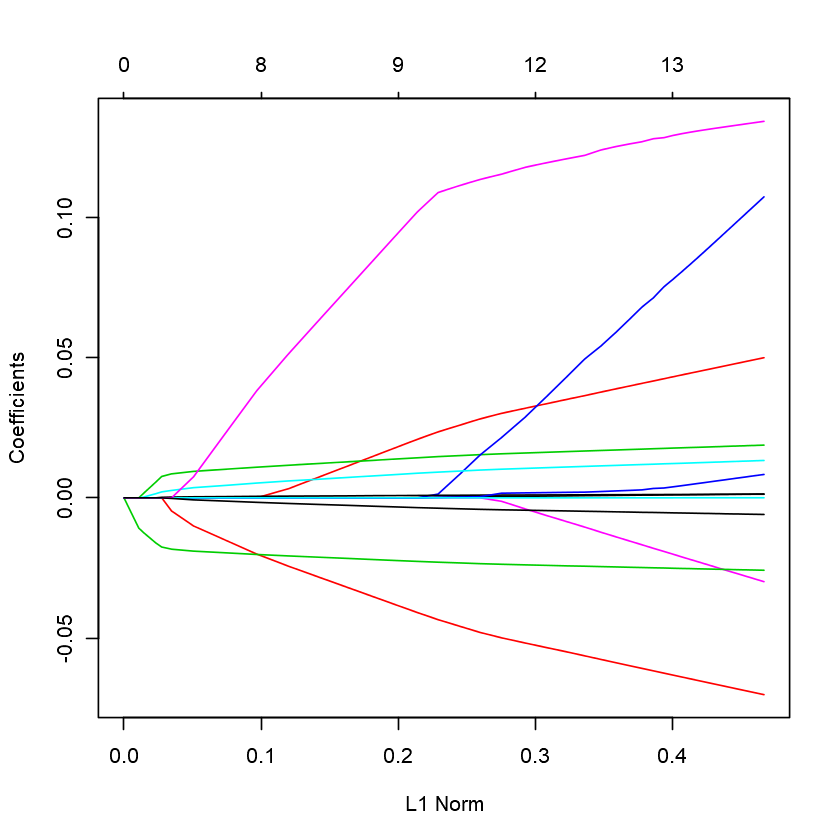

In [36]:
rel_vars<-double_lasso_penalization_function(child_data)

## First Lasso Results

In [26]:
rel_vars[[1]]


names,x
(Intercept),5.577733e-01
pooled_treatment,2.693356e-01
control_fu_hh_head_edu,3.319121e-03
control_fu_household_size,-1.497416e-05


## Second Lasso Results

In [27]:
rel_vars[[2]]

.rownames,X1
(Intercept),0.02395864
pooled_treatment,0.97084947
missing_fu_child_age,0.00000000
control_fu_child_age,0.00000000
missing_fu_female,0.00000000
control_fu_female,0.00000000
missing_fu_adults,0.00000000
control_fu_adults,0.00000000
missing_fu_hh_head_edu,0.00000000
control_fu_hh_head_edu,0.00000000


 **Results**
- In the paper by Berrera et. al, the treatment effect of the pooled treatment on different outcomes could be spurious, either due to non-effective randomization or inclusion of spurious variables. To test the power of the list of controls we use Double Lasso and in the first step, effectively filter down two important and non-zero predictors of enrollment. Household wealth and Education of Household Head. 
- The second step returns no non-zero predictors. This indicates that the randomization of the treatment was complete and purely random , at least given the list of household and child controls under use.
- The third step is to rerun the initial estimation regression using the variables selected by the model. The results from the variable-restricted regression barely changes results. 
- The Caveat is that double-lasso cannot tell use which variables make logical/theoretical sense to include. This requires a detailed and thorough literature review as well as causal analysis.
- However in both respects, controlling for non-zero controls as well as in re-checking the randomization, the results from Berrera et. al. remain stable.


In [28]:
double_lasso_robustness_check_table(child_data)

, Program Impacts on Test Scores , Dependent variable: , , Child Enrollment , (1) (2) (3) (4) (5) , Pooled Treatment 0.316 *** 0.316 *** 0.313 *** 0.317 *** 0.314 *** , (0.013) (0.013) (0.013) (0.012) (0.013) , , Child Age 0.007 *** 0.008 *** 0.009 *** , (0.003) (0.003) (0.003) , , Child Female -0.014 * -0.015 * -0.016 ** , (0.008) (0.008) (0.008) , , Adults in Household 0.006 0.008 ** , (0.004) (0.004) , , Household education 0.010 *** 0.010 *** 0.010 *** , (0.001) (0.001) (0.001) , , Total Land 0.0002 *** 0.0002 *** , (0.0001) (0.0001) , , Household Size -0.013 *** -0.014 *** -0.011 *** , (0.002) (0.002) (0.002) , , Child Controls no yes yes yes no , HH Controls no no yes yes no , District Fixed Effects no no no yes no , FALSE , Observations 11,717 11,717 11,717 11,717 11,717 , R 2 0.086 0.087 0.103 0.109 0.101 , Adjusted R 2 0.086 0.087 0.102 0.107 0.101 , Residual Std. Error 0.452 (df = 11715) 0.452 (df = 11712) 0.448 (df = 11703) 0.447 (df = 11694) 0.448 (df = 11713) , F Statistic 1,101.769 *** (df = 1; 11715) 279.463 *** (df = 4; 11712) 103.667 *** (df = 13; 11703) 65.055 *** (df = 22; 11694) 439.370 *** (df = 3; 11713) , Note: * p<0.1; ** p<0.05; *** p<0.01 ,

### Robustness Check : Double Randomization

A secondary robustness check is to double randomize the treatment. In most RCT studies, especially medical trials, the treatment is double blinded to reduce tester's bias as much as possible,  and to detect spillovers and interference. In this circumstance, I randomize the pool treatment as a robustness check to ensure that no significant results are obtained when a placebo treatment is used.


 [Insert equation]
This method allows us to control for spurious results, as actual treatment effect should not be discovered or attributed to a placebo treatment. The distribution of the treatments is show below. 1 denotes the true treatment while 2 denotes the re-randomized treatment. This also serves as a check of effective randomization.


Table [] shows the results of the regression of the re-randomized  treatment on the outcome. All the coefficients are small and non-significant at all levels of controls. This test can be repeated multiple times with different randomizations, to ensure that our treatment effect captures the actual effect of the treatment and not due to missing variables that impurify the randomization.


In [46]:
double_random_plot<-double_randomization_plot(child_data) #3-d plots do not display in github/nbviewer (hence using saved output as jpeg,comment out to run the code necessary to generate)
#double_random_plot

![](https://firebasestorage.googleapis.com/v0/b/firescript-577a2.appspot.com/o/imgs%2Fapp%2FAbraham_MindDump%2F_o-rPVJXBQ.png?alt=media&token=f60b183a-595d-41ff-9c58-eb97b78c05ef)


## Estimating treatment effect using Double Randomized Placebo Treatment

In [31]:
child_data_randomized<-child_data %>% transform(child_data, pooled_treatment = sample(pooled_treatment))
Table_3(child_data_randomized)


, Program Impacts on Enrollment , Dependent variable: , , Reported Enrollment Highest Grade Attained , (1) (2) (3) (4) (5) , Pooled Treatment -0.006 -0.007 -0.008 -0.006 -0.025 , (0.011) (0.011) (0.010) (0.010) (0.030) , , Child Controls no yes yes yes yes , HH Controls no no yes yes yes , District Fixed Effects no no no yes yes , Observations 11,717 11,717 11,717 11,717 11,211 , R 2 0.00004 0.001 0.019 0.027 0.210 , Adjusted R 2 -0.00005 0.001 0.018 0.025 0.209 , Residual Std. Error 0.473 (df = 11715) 0.473 (df = 11712) 0.469 (df = 11703) 0.467 (df = 11694) 1.195 (df = 11188) , F Statistic 0.416 (df = 1; 11715) 4.197 *** (df = 4; 11712) 17.537 *** (df = 13; 11703) 14.527 *** (df = 22; 11694) 135.365 *** (df = 22; 11188) , Note: * p<0.1; ** p<0.05; *** p<0.01 ,